# Parental Leave Policies

Crowdsourced parental leave data from 1,601 companies across different industries, including paid/unpaid maternity and paternity leave weeks.

Data: [Download](https://maven-datasets.s3.amazonaws.com/Parental+Leave/Parental+Leave.zip)

Libraries used:
- pandas
- numpy
- matplotlib
- seaborn

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data in

data_dictionary = pd.read_csv('../data/parental_leave/data_dictionary.csv')
data = pd.read_csv('../data/parental_leave/parental_leave.csv', encoding='latin1')


In [3]:
display(data_dictionary)

,Field,Description
0,Company,Company name
1,Industry,Company industry & sub-industry (Industry: Sub...
2,Paid Maternity Leave,Paid weeks off from work for mothers after the...
3,Unpaid Maternity Leave,Unpaid weeks off from work for mothers after t...
4,Paid Paternity Leave,Paid weeks off from work for fathers after the...
5,Unpaid Paternity Leave,Unpaid weeks off from work for fathers after t...
6,NaN,NOTE: This is user-reported data. Where users ...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 1601 non-null   object 
 1   Industry                1598 non-null   object 
 2   Paid Maternity Leave    1601 non-null   float64
 3   Unpaid Maternity Leave  1494 non-null   float64
 4   Paid Paternity Leave    289 non-null    float64
 5   Unpaid Paternity Leave  64 non-null     float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 125.2+ KB


In [5]:
# Have to do some cleaning, as the dataframe has 4 extra columns that we don't need. from position 6 onwards
# we can drop them
data = data.drop(data.columns[6:], axis=1)

## Analysis

### Question 1: Which companies offer the most paid parental leave weeks?

In [6]:
# lets use the Pandas Styler feature to format the dataframe to gradient rows based on the Paid Maternity Leabe + Paid Paternity Leave
data['Total Parental Leave'] = data['Paid Maternity Leave'] + data['Paid Paternity Leave']
data_for_styling = data[['Company', 'Industry', 'Total Parental Leave']]

In [7]:
data_for_styling.sort_values(by='Total Parental Leave', ascending=False).head(25).style.background_gradient(cmap='Blues')

,Company,Industry,Total Parental Leave
47,Grant Thornton,Accounting Services,102.000000
148,LAC-Group,Information Services: Diversified,67.500000
129,Flatiron Health,Healthcare: Telemedicine,60.000000
248,Salesforce,Technology: Software,52.000000
188,Bill and Melinda Gates Foundation,Philanthropy,52.000000
207,Hewlett Packard Enterprise,Technology: B2B Tech Services,52.000000
31,Dropbox,Technology: Consumer Internet,48.000000
1079,Start Early,Nonprofit: Education,48.000000
224,Zynga,Technology: Gaming,44.000000
114,TIAA Bank,Finance: Personal & Commercial Banking,44.000000


In [8]:
maternity_data = data[['Company', 'Industry', 'Paid Maternity Leave']]
paternity_data = data[['Company', 'Industry', 'Paid Paternity Leave']]

maternity_data.sort_values(by='Paid Maternity Leave', ascending=False).head(25).style.background_gradient(cmap='Blues')

,Company,Industry,Paid Maternity Leave
1023,ASML,nan,52.000000
1543,Scentsy,Consumer Packaged Goods: Packaged Products,52.000000
886,LeverX,Information Services: Technology,52.000000
1076,Washburn Center For Children,Nonprofit: Civic & Social,52.000000
1068,World Vision,Nonprofit: Charity,52.000000
1431,JHC Systems,Technology: Software,52.000000
945,American Income Life,Insurance: Life,52.000000
1282,Cloudworkers,Technology: Consumer Internet,52.000000
1380,Bitdefender,Technology: Software,52.000000
538,University of British Columbia,Educational Services: College & Universities,52.000000


In [9]:
paternity_data.sort_values(by='Paid Paternity Leave', ascending=False).head(25).style.background_gradient(cmap='Blues')

,Company,Industry,Paid Paternity Leave
47,Grant Thornton,Accounting Services,51.000000
148,LAC-Group,Information Services: Diversified,35.000000
129,Flatiron Health,Healthcare: Telemedicine,30.000000
248,Salesforce,Technology: Software,26.000000
188,Bill and Melinda Gates Foundation,Philanthropy,26.000000
207,Hewlett Packard Enterprise,Technology: B2B Tech Services,26.000000
31,Dropbox,Technology: Consumer Internet,24.000000
1079,Start Early,Nonprofit: Education,24.000000
149,S&P Global,Information Services: Financial,23.000000
5,Bain & Company,Consulting Services,21.000000


We can see the most amount of paid parental leave (maternity + paternity) weeks offered by companies in the dataset. Grant Thornton, an Accounting services firm, offers the most total paid parental leave at 102 weeks.
For maternity leave, there are 20 companies tied at #1, having 52 weeks of maternity leave, including ASML, Bitdefender, Netflix, and Dynatrace. For paternity leave, Grant Thornton offers the most at 51 weeks, followed by LAC Group and Flatiron Health rounding out the top three, with companies like Merrill, Postmates, and Mastercard tied for 10th place with 16 weeks of paternity leave.

### Question 2: Is maternity leave typically longer than paternity leave?

In [10]:
data['Total Maternity Leave'] = data['Paid Maternity Leave'] + data['Unpaid Maternity Leave']
data['Total Paternity Leave'] = data['Paid Paternity Leave'] + data['Unpaid Paternity Leave']

In [11]:
# next, lets get the anova statistics and compare the Total Maternity Leave and Total Paternity Leave columns to see if there is a significant difference

data['Total Maternity Leave'].describe()

count    1494.000000
mean       17.577979
std        12.628712
min         0.000000
25%        12.000000
50%        14.000000
75%        20.000000
max       104.000000
Name: Total Maternity Leave, dtype: float64

In [12]:
data['Total Paternity Leave'].describe()

count    49.000000
mean     14.357143
std       9.388601
min       0.000000
25%       9.000000
50%      12.000000
75%      18.000000
max      48.000000
Name: Total Paternity Leave, dtype: float64

Maternity leave is on average three weeks longer than paternity leave. The average maternity leave is approx 17.5 weeks compared to 14.35 weeks of paternity leave. This dataset only has 49 companies with paternity leave policies however, compared to 1,494 companies with maternity leave policies. This could be due to the fact that paternity leave is not as common as maternity leave. The median maternity leave is 14 weeks, with the median paternity leave being 12 weeks. 

### Question 3: What is the distribution of parental leave weeks offered?

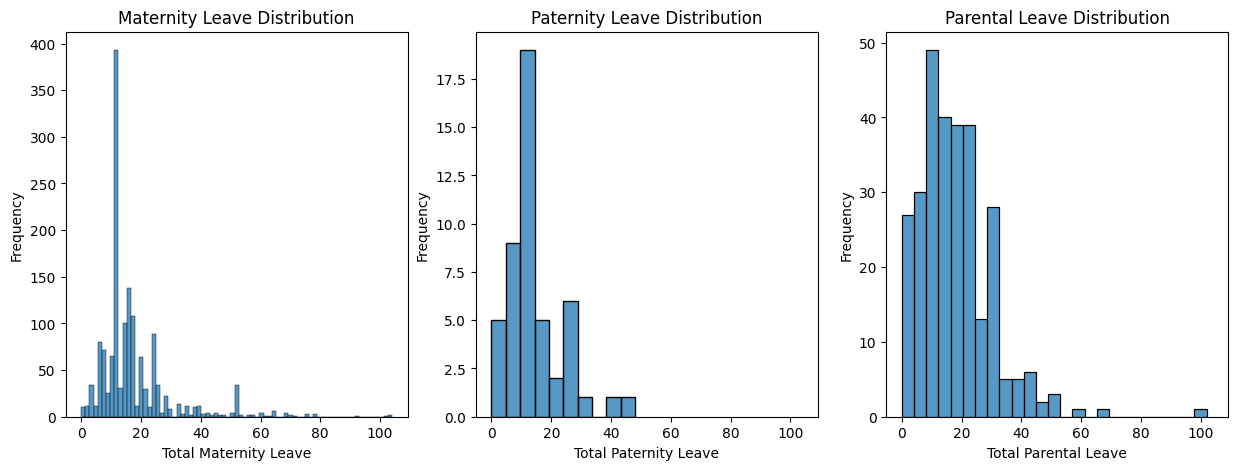

In [13]:
# Since we want to see a distribution, we will plot a histogram of total leave, total maternity leave and total paternity leave
f, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=False)

# they all share the same y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Total Maternity Leave')
ax[1].set_xlabel('Total Paternity Leave')
ax[2].set_xlabel('Total Parental Leave')


# Add titles to each subplot
ax[0].set_title('Maternity Leave Distribution')
ax[1].set_title('Paternity Leave Distribution')
ax[2].set_title('Parental Leave Distribution')


sns.histplot(data=data, x='Total Maternity Leave', ax=ax[0])
sns.histplot(data=data, x='Total Paternity Leave', ax=ax[1])
sns.histplot(data=data, x='Total Parental Leave', ax=ax[2])

plt.show()

### Question 4: Are there noticable differences between industries?

In [14]:
# first, lets count how many distinct industries there are in the data
data['Industry'].value_counts()

Industry
Technology: Software                            160
Technology: Consumer Internet                    64
Educational Services: College & Universities     52
Advertising                                      50
Information Services: Technology                 47
                                               ... 
Natural Resources: Agrochemical                   1
Nonprofit: Development                            1
Nonprofit: Humanitarian Aid Organization          1
Nonprofit: Libraries                              1
Maritime                                          1
Name: count, Length: 185, dtype: int64

In [15]:
# lets group the data by industry

maternity_grouped = data.groupby('Industry')['Total Maternity Leave'].agg(['median', 'mean'])
paternity_grouped = data.groupby('Industry')['Total Paternity Leave'].agg(['median', 'mean'])
parental_grouped = data.groupby('Industry')['Total Parental Leave'].agg(['median', 'mean'])

In [17]:
maternity_grouped = maternity_grouped.reset_index()
paternity_grouped = paternity_grouped.reset_index()
parental_grouped = parental_grouped.reset_index()

In [18]:
# theres a few ways to do this, I think creating an interactive plot which one can select which industries to view in the bar chart will be easier - we will use ipywidgets for this
import ipywidgets as widgets

industries = data['Industry'].unique().tolist()

industry_dropdown = widgets.Dropdown(options=industries, value=industries[0], description='Industry:')

def plot_industry_box_plot(industry):
    f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
    
    # set the labels
    axes[0].set_ylabel('Weeks')
    axes[1].set_xlabel(industry)

    # set the titles
    axes[0].set_title('Maternity Leave Box Plot')
    axes[1].set_title('Paternity Leave Box Plot')
    axes[2].set_title('Parental Leave Box Plot')

    # plot the box plots
    sns.boxplot(x='Industry', y='Total Maternity Leave', data=data[data['Industry'] == industry], ax=axes[0])
    sns.boxplot(x='Industry', y='Total Paternity Leave', data=data[data['Industry'] == industry], ax=axes[1])
    sns.boxplot(x='Industry', y='Total Parental Leave', data=data[data['Industry'] == industry], ax=axes[2])

    plt.show()



In [22]:
# now lets start the interactive plot
widgets.interact(plot_industry_box_plot, industry=industry_dropdown)

interactive(children=(Dropdown(description='Industry:', options=('Advertising', 'Arts & Entertainment', 'Busin…

<function __main__.plot_industry_box_plot(industry)>

After interacting with the interactive plot above, there are a few observations we can make regarding differences across industries. Nearly all government industries (contractor, federal, state, and local) in the dataset do not offer any paternity leave. A very small amount of healthcare companies in the dataset offer paternity leave, a very suprising observation. The maritime companies within the dataset offer no leave at all! Sports industries offer maternity leave but no paternity leave. Finance offers barely any leave what so ever, with the boxplot showing one line at approx 15 weeks. Education seems to offer the most maternity leave, with the boxplot showing the median at 16 and the max at 26 weeks for maternity leave.